## General network properties: Size, Degree

For all interactomes:
* Number of connected components
* Size of the largest connected component
* Relative size of the largest connected component
* Average size of the connected components
* Size of the smallest component
* Number of isolated nodes

For all pathways:
- Sizes of connected components for all pathways

In [1]:
import pandas as pd
import seaborn as sns

import config
from config import LEVELS, GRAPHS_PATH
from lib.networks import get_interactomes
from lib.networks import get_multiindex
from lib.networks import get_sizes

% load_ext autoreload
% autoreload 2
% reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [22]:
index = get_multiindex()
interactomes_no_sm, interactomes_with_sm, interactomes_with_unique_sm = get_interactomes(GRAPHS_PATH)
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]

In [23]:
num_interactions, num_entities, num_small_molecules = get_sizes(interactomes, index)
num_interactions

Small Molecules           Entity Level
Not Included              genes            453137
                          proteins         462430
                          proteoforms      677057
Included                  genes            528969
                          proteins         538874
                          proteoforms      759198
Reaction-Unique Included  genes            839401
                          proteins         853568
                          proteoforms     1077886
dtype: int64

In [24]:
df_sizes = pd.DataFrame({
    "Interactions": num_interactions,
    "Accessioned Entities": num_entities,
    "Small Molecules": num_small_molecules
}, index=index)
df_sizes.columns.name = "Sizes"
df_sizes

Sizes                                  Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               528969                 10968   
                         proteins            538874                 11066   
                         proteoforms         759198                 14295   
Reaction-Unique Included genes               839401                 10968   
                         proteins            853568                 11066   
                         proteoforms        1077886                 14295   

Sizes                                  Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

In [25]:
# Create a list with the number of genes, proteins, proteoforms, small molecules
num_nodes = [*df_sizes.loc[['Not Included']]["Accessioned Entities"], df_sizes.loc[['Included']]["Small Molecules"][0]]

# Create list with all levels:
node_types = [*LEVELS, "small molecules"]

# Create a list with the number of interactions without the small molecules
num_interactions_no_sm = df_sizes.loc[['Not Included']]["Interactions"]

num_interactions_with_sm = df_sizes.loc[['Included']]["Interactions"]

maxy = max([*num_interactions_with_sm, *num_interactions_no_sm])

maxy = 800000

<ipython-input-26-8991b48bd7fb>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(LEVELS, rotation=45)
<ipython-input-26-8991b48bd7fb>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(LEVELS, rotation=45)


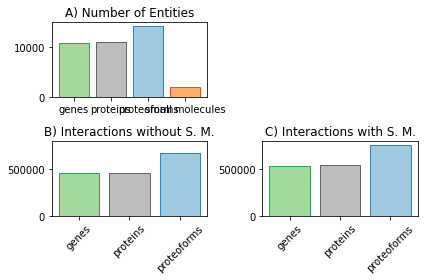

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from config import COLORS_BORDER

figure, axis = plt.subplots(1, 4)
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot number of nodes
plot1.bar(node_types, num_nodes, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot1.set_title('A) Number of Entities')

plt.xticks(rotation=90)

# Plot number of interactions without small molecules
plot2.bar(LEVELS, num_interactions_no_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot2.set_title('B) Interactions without S. M.')
plot2.set_ylim([0, maxy])
plot2.set_xticklabels(LEVELS, rotation=45)

# Plot number of interactions with small molecules
plot3.bar(LEVELS, num_interactions_with_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot3.set_title('C) Interactions with S. M.')
plot3.set_ylim([0, maxy])
plot3.set_xticklabels(LEVELS, rotation=45)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

figure.savefig('figures/figure_4.png')
plt.close()

In [41]:
from lib.networks import get_increase_percentage
from config import genes, proteins, proteoforms

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_nodes(),
                                   interactomes_no_sm[proteins].number_of_nodes())
print(f"There are {increase} % more nodes in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_edges(),
                                   interactomes_no_sm[proteins].number_of_edges())
print(f"There are {increase} % more interactions in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_nodes(),
                                   interactomes_no_sm[proteoforms].number_of_nodes())
print(f"There are {increase} % more nodes in the proteoform interactome than in the protein interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_edges(),
                                   interactomes_no_sm[proteoforms].number_of_edges())
print(f"There are {increase} % more interactions in the proteoform interactome than in the protein interactome.")

There are 0.89 % more nodes in the protein interactome than in the gene interactome.
There are 2.01 % more interactions in the protein interactome than in the gene interactome.
There are 22.59 % more nodes in the proteoform interactome than in the protein interactome.
There are 31.7 % more interactions in the proteoform interactome than in the protein interactome.


In [44]:
from statistics import mean
from lib.dictionaries import read_dictionary_one_to_set

map_genes_to_proteins = read_dictionary_one_to_set(config.GRAPHS_PATH, "mapping_proteins_to_genes.tsv",
                                                   col_indices=(1, 0))
print(f"There are {len(map_genes_to_proteins.keys())} genes in the map.")

avg_proteins_per_gene = round(mean([len(map_genes_to_proteins[key]) for key in map_genes_to_proteins.keys()]), 2)
print(f"The average number of proteins per gene is {avg_proteins_per_gene}")

There are 10968 genes in the map.
The average number of proteins per gene is 1.01


In [45]:
map_proteins_to_proteoforms = read_dictionary_one_to_set(config.GRAPHS_PATH, "mapping_proteins_to_proteoforms.tsv",
                                                         col_indices=(0, 1))
print(f"There are {len(map_proteins_to_proteoforms.keys())} proteins in the map.")

avg_proteoforms_per_protein = round(
    mean([len(map_proteins_to_proteoforms[key]) for key in map_proteins_to_proteoforms.keys()]), 2)
print(f"The average number of proteoforms per protein is {avg_proteoforms_per_protein}")

There are 11066 proteins in the map.
The average number of proteoforms per protein is 1.29


In [28]:
degree_sequences = []
for interactome in interactomes:
    accessioned_nodes = [node for node, data in interactome.nodes(data=True) if not data['type'].startswith("Simple")]
    sequence = sorted([d for n, d in interactome.degree(accessioned_nodes)], reverse=True)
    degree_sequences.append(sequence)

degree_sequences = pd.Series([sorted(sequence, reverse=True) for sequence in degree_sequences], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [1293, 1270, 1106, 1106, 1035, 1024, 638, 614,...
                          proteins        [1294, 1271, 1107, 1107, 1037, 1026, 638, 616,...
                          proteoforms     [1520, 1495, 1327, 1327, 1048, 1030, 743, 716,...
Reaction-Unique Included  genes           [1920, 1890, 1809, 1769, 1559, 1559, 1498, 148...
                          proteins        [1922, 1892, 1810, 1770, 1560, 1560, 1500, 148...
                          proteoforms     [2029, 1987, 1933, 1896, 1773, 1773, 1494, 148...
dtype: object

In [29]:
i = interactomes_no_sm["genes"]
df = pd.DataFrame(data=list(i.degree()), columns=['Node', 'Degree'])
df.sort_values(by=['Degree'], inplace=True)
df

,Node,Degree
5483,GPR35,0
4091,AOC3,0
4092,BPHL,0
4093,CMBL,0
4097,NQO2,0
...,...,...
1041,GNB1,902
62,UBB,1057
61,UBC,1057
63,UBA52,1218


In [30]:
print(f"(Genes, No SM) {interactomes_no_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_no_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With SM) {interactomes_with_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With Unique SM) {interactomes_with_unique_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_unique_sm['genes'].neighbors('GPR35')]}")


(Genes, No SM) 0
Neighbours: []
(Genes, With SM) 1
Neighbours: ['sm_Kynurenic_acid']
(Genes, With Unique SM) 2
Neighbours: ['sm_R-HSA-6805205_Kynurenic_acid', 'sm_R-HSA-6805208_Kynurenic_acid']


In [31]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence) / len(degree_sequence) for degree_sequence in degree_sequences], index=index)

df_degrees = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_degrees


Min   Max    Avg
Small Molecules          Entity Level                  
Not Included             genes           0  1241  82.63
                         proteins        0  1242  83.58
                         proteoforms     0  1469  94.73
Included                 genes           0  1293  88.31
                         proteins        0  1294  89.26
                         proteoforms     0  1520  99.53
Reaction-Unique Included genes           0  1920 112.64
                         proteins        0  1922 113.77
                         proteoforms     0  2029 118.77

In [32]:
df_seq = pd.DataFrame({"Sequence": degree_sequences})
df_seq.reset_index(inplace=True)
lst_col = 'Sequence'

df_seq = pd.DataFrame({
    col: np.repeat(df_seq[col].values, df_seq[lst_col].str.len())
    for col in df_seq.columns.drop(lst_col)}
).assign(**{lst_col: np.concatenate(df_seq[lst_col].values)})[df_seq.columns]

df_seq = df_seq.rename(columns={'Sequence': 'Degree'})
df_seq['Degree'] = df_seq['Degree'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_seq

,Small Molecules,Entity Level,Degree
0,Not Included,genes,3.09
1,Not Included,genes,3.09
2,Not Included,genes,3.02
3,Not Included,genes,3.02
4,Not Included,genes,2.96
...,...,...,...
108982,Reaction-Unique Included,proteoforms,0.00
108983,Reaction-Unique Included,proteoforms,0.00
108984,Reaction-Unique Included,proteoforms,0.00
108985,Reaction-Unique Included,proteoforms,0.00


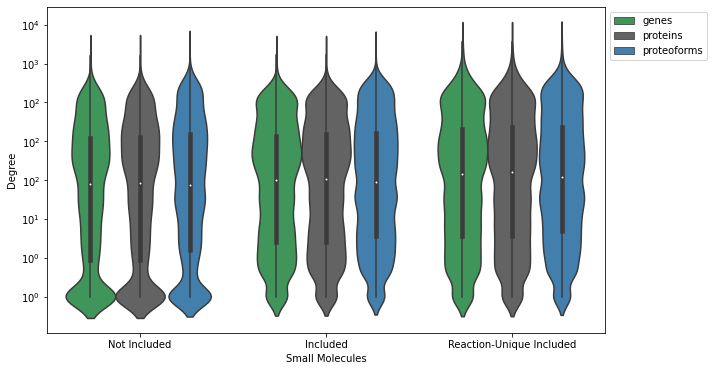

In [33]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
fig5 = sns.violinplot(x="Small Molecules", y="Degree", hue="Entity Level", data=df_seq, palette=config.COLORS_BORDER)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))  # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0.5)  # Put the legend out of the figure
plt.show()
fig5.figure.savefig('figures/figure_5.png')

In [64]:
from pathlib import Path
from config import METHODS, PATHWAY_GRAPHS_PATH
from config import LEVELS
from lib.networks import get_json_filename, create_pathway_interaction_network, read_graph
from lib.graph_database_access import get_pathways

columns = [
    'Pathway',
    'Small Molecules',
    'Increase Nodes Genes-Proteins',
    'Increase Interactions Genes-Proteins',
    'Increase Nodes Proteins-Proteoforms',
    'Increase Interactions Proteins-Proteoforms'
]


def get_pathway_tuples(pathway, graphs):
    increase_nodes_genes_proteins = get_increase_percentage(graphs[genes].number_of_nodes(),
                                                            graphs[proteins].number_of_nodes())
    increase_links_genes_proteins = get_increase_percentage(graphs[genes].number_of_edges(),
                                                            graphs[proteins].number_of_edges())
    increase_nodes_proteins_proteoforms = get_increase_percentage(graphs[proteins].number_of_nodes(),
                                                                  graphs[proteoforms].number_of_nodes())
    increase_links_proteins_proteoforms = get_increase_percentage(graphs[proteoforms].number_of_edges(),
                                                                  graphs[proteoforms].number_of_edges())

    return (
        pathway,
        graphs[genes].graph["method"],
        increase_nodes_genes_proteins,
        increase_links_genes_proteins,
        increase_nodes_proteins_proteoforms,
        increase_links_proteins_proteoforms
    )


data_pathways = []
pathways = get_pathways()["stId"]
for pathway in pathways:
    for method in METHODS:
        pathway_graphs = {}
        for level in LEVELS:
            filename = get_json_filename(level, method, PATHWAY_GRAPHS_PATH, pathway)
            if not Path(filename).exists():
                create_pathway_interaction_network(pathway, level, method, PATHWAY_GRAPHS_PATH)
            G = read_graph(filename)
            pathway_graphs[level] = G
        if pathway_graphs[genes].number_of_nodes() > 0\
                and pathway_graphs[genes].number_of_edges() > 0\
                and pathway_graphs[genes].number_of_nodes() < 20:
            data_pathways.append(get_pathway_tuples(pathway, pathway_graphs))

df_pathways = pd.DataFrame.from_records(data_pathways, columns=columns)
df_pathways

,Pathway,Small Molecules,Increase Nodes Genes-Proteins,Increase Interactions Genes-Proteins,Increase Nodes Proteins-Proteoforms,Increase Interactions Proteins-Proteoforms
0,R-HSA-8934903,no_sm,0.00,0.00,21.43,0.00
1,R-HSA-8934903,with_sm,0.00,0.00,18.75,0.00
2,R-HSA-8934903,with_unique_sm,0.00,0.00,15.00,0.00
3,R-HSA-9613354,no_sm,0.00,0.00,25.00,0.00
4,R-HSA-9613354,with_sm,0.00,0.00,20.00,0.00
...,...,...,...,...,...,...
2289,R-HSA-190861,with_sm,0.00,0.00,0.00,0.00
2290,R-HSA-190861,with_unique_sm,0.00,0.00,0.00,0.00
2291,R-HSA-190827,no_sm,0.00,0.00,0.00,0.00
2292,R-HSA-190827,with_sm,0.00,0.00,0.00,0.00


In [70]:
from bokeh.io import show
from visualization.visualize_single_network import Coloring, plot_pathway_all_levels
from lib.networks import create_pathway_interaction_networks

# Example nodes genes-proteins
df_pathways.sort_values(by=['Increase Nodes Genes-Proteins'], ascending=False, inplace=True)
examples = df_pathways.head(20)["Pathway"].unique()
print(examples)

for example in examples:
    graphs = create_pathway_interaction_networks(example, "resources/pathway_networks/")
    p = plot_pathway_all_levels(example, out_path="resources/pathway_networks/", graphs=graphs,
                                coloring=Coloring.ENTITY_TYPE, outline_line_width=1,
                                node_size = 12,
                                inner_plot_size=350,
                                highlight_articulations=True,
                                highlight_bridges=True,
                                toolbar_location='below')
    show(p)

['R-HSA-1236977' 'R-HSA-947581' 'R-HSA-419812' 'R-HSA-164378'
 'R-HSA-392851' 'R-HSA-9613354' 'R-HSA-9664873' 'R-HSA-174437'
 'R-HSA-8934903' 'R-HSA-888568' 'R-HSA-75035' 'R-HSA-888593'
 'R-HSA-2470946']
-- Creating interaction networks for pathway R-HSA-1236977
Generated figure: resources/pathway_networks/R-HSA-1236977_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-947581
Generated figure: resources/pathway_networks/R-HSA-947581_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-419812
Generated figure: resources/pathway_networks/R-HSA-419812_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-164378
Generated figure: resources/pathway_networks/R-HSA-164378_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-392851
Generated figure: resources/pathway_networks/R-HSA-392851_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-9613354
Generated figure: resources/pa

In [71]:
# Example nodes proteins-proteoforms
df_pathways.sort_values(by=['Increase Nodes Proteins-Proteoforms'], ascending=False, inplace=True)
examples = df_pathways.head(10)["Pathway"].unique()
print(examples)

['R-HSA-69200' 'R-HSA-3000480' 'R-HSA-444257' 'R-HSA-2214320'
 'R-HSA-1912399' 'R-HSA-9673768']
